# Análise e exploração do dataset

In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.9


In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sea
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
dtypes = {  'cnpj': 'str',
            'razao_social': 'str',
            'identificador_matriz': 'bool',             
            'situacao_cadastral_ativa': 'bool', 
            'uf': 'str', 
            'municipio': 'str', 
            'capital_social_empresa': 'float64',
            'porte_empresa': 'str', 
            'opcao_pelo_simples': 'str', 
            'nm_subclass_natureza_juridica': 'str',          
            'nm_secao': 'str',           
            'nm_divisao': 'str', 
            'idade_empresa': 'int32',            
            'participacoes': 'int32',  
            'vitorias': 'int32',
            'contratos': 'int32',
            'risco': 'bool'
         }

In [4]:
dataset = pd.read_csv('./dataset_tratado.csv', dtype = dtypes)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56850 entries, 0 to 56849
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cnpj                           56850 non-null  object 
 1   razao_social                   56850 non-null  object 
 2   uf                             56850 non-null  object 
 3   municipio                      56850 non-null  object 
 4   capital_social_empresa         56850 non-null  float64
 5   porte_empresa                  56850 non-null  object 
 6   opcao_pelo_simples             56850 non-null  object 
 7   nm_subclass_natureza_juridica  56850 non-null  object 
 8   nm_secao                       56850 non-null  object 
 9   nm_divisao                     56850 non-null  object 
 10  participacoes                  56850 non-null  int32  
 11  vitorias                       56850 non-null  int32  
 12  contratos                      56850 non-null 

In [6]:
dataset.shape

(56850, 17)

O dataset contém 17 colunas, onde _risco_ é a variável de interesse, _cnpj_ e _razao_social_ servem apenas para identificar as empresas e não serão utilizadas no modelo de ML e as outras 14 colunas são as variáveis preditivas.

In [7]:
dataset.isnull().sum()

cnpj                             0
razao_social                     0
uf                               0
municipio                        0
capital_social_empresa           0
porte_empresa                    0
opcao_pelo_simples               0
nm_subclass_natureza_juridica    0
nm_secao                         0
nm_divisao                       0
participacoes                    0
vitorias                         0
contratos                        0
risco                            0
identificador_matriz             0
idade_empresa                    0
situacao_cadastral_ativa         0
dtype: int64

Acima, vemos que não existem valores nulos em nenhuma coluna.

## Distribuição das variáveis

* __situacao_cadastral_ativa__:

In [8]:
qt = (dataset['situacao_cadastral_ativa'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'Situação Cadastral'}, inplace = True) 
qt

,Situação Cadastral,Porcentagem empresas
0,True,92.133685
1,False,7.866315


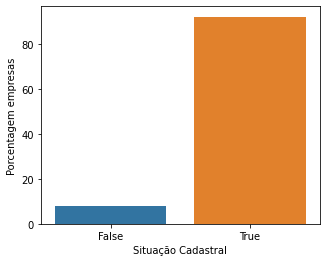

In [9]:
f, ax = plt.subplots()
f.set_size_inches(5, 4)
ax = sea.barplot(y = qt['Porcentagem empresas'], x = qt['Situação Cadastral'])

* __uf__:

In [10]:
qt = (dataset['uf'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'UF'}, inplace = True)
qt

,UF,Porcentagem empresas
0,SP,17.261214
1,MG,10.722955
2,RJ,9.122252
3,RS,7.430079
4,PR,7.129288
5,DF,6.613896
6,SC,4.036939
7,BA,3.686895
8,PA,3.519789
9,PE,3.203166


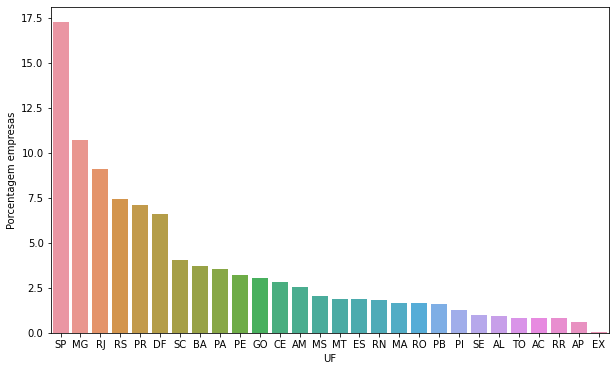

In [11]:
f, ax = plt.subplots()
f.set_size_inches(10, 6)
ax = sea.barplot(y = qt['Porcentagem empresas'], x = qt['UF'])

* __municipio__:

In [12]:
qt = (dataset['municipio'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'Município'}, inplace = True)
qt

,Município,Porcentagem empresas
0,OUTROS,53.000880
1,SAO PAULO,7.730871
2,BRASILIA,6.613896
3,RIO DE JANEIRO,6.420405
4,BELO HORIZONTE,3.570800
5,CURITIBA,2.803870
6,PORTO ALEGRE,2.775726
7,FORTALEZA,2.043975
8,MANAUS,2.040457
9,RECIFE,1.878628


[Text(0, 0, 'OUTROS'),
 Text(1, 0, 'SAO PAULO'),
 Text(2, 0, 'BRASILIA'),
 Text(3, 0, 'RIO DE JANEIRO'),
 Text(4, 0, 'BELO HORIZONTE'),
 Text(5, 0, 'CURITIBA'),
 Text(6, 0, 'PORTO ALEGRE'),
 Text(7, 0, 'FORTALEZA'),
 Text(8, 0, 'MANAUS'),
 Text(9, 0, 'RECIFE'),
 Text(10, 0, 'GOIANIA'),
 Text(11, 0, 'SALVADOR'),
 Text(12, 0, 'BELEM'),
 Text(13, 0, 'CAMPO GRANDE'),
 Text(14, 0, 'NATAL'),
 Text(15, 0, 'SAO LUIS'),
 Text(16, 0, 'PORTO VELHO'),
 Text(17, 0, 'CUIABA')]

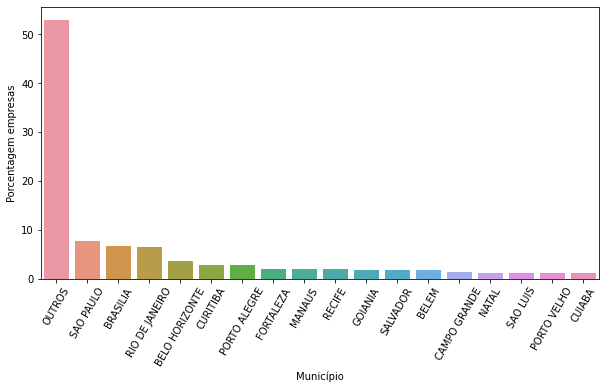

In [13]:
f, ax = plt.subplots()
f.set_size_inches(10, 5)
ax = sea.barplot(y = qt['Porcentagem empresas'], x = qt['Município'])
ax.set_xticklabels(labels = qt['Município'], rotation = 60)

* __porte_empresa__:

In [14]:
qt = (dataset['porte_empresa'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'porte_empresa'}, inplace = True)
qt

,porte_empresa,Porcentagem empresas
0,Micro Empresa,37.614776
1,Demais,32.615655
2,Empresa de Pequeno Porte,29.769569


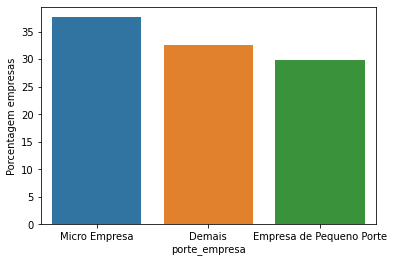

In [15]:
f, ax = plt.subplots()
f.set_size_inches(6, 4)
ax = sea.barplot(y = qt['Porcentagem empresas'], x = qt['porte_empresa'])

* __opcao_pelo_simples__:

In [16]:
qt = (dataset['opcao_pelo_simples'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'opcao_pelo_simples'}, inplace = True)
qt

,opcao_pelo_simples,Porcentagem empresas
0,Optante,40.207564
1,Não optante,38.255057
2,Excluída,21.537379


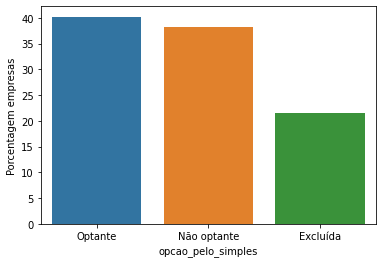

In [17]:
f, ax = plt.subplots()
f.set_size_inches(6, 4)
ax = sea.barplot(y = qt['Porcentagem empresas'], x = qt['opcao_pelo_simples'])

* __nm_subclass_natureza_juridica__:

In [18]:
qt = (dataset['nm_subclass_natureza_juridica'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'nm_subclass_natureza_juridica'}, inplace = True)
qt

,nm_subclass_natureza_juridica,Porcentagem empresas
0,Sociedade Empresária Limitada,58.636763
1,Empresa Individual de Responsabilidade Limitad...,18.503078
2,Empresário (Individual),9.013193
3,Outros,4.851363
4,Associação Privada,3.313984
5,Sociedade Simples Limitada,3.030783
6,Sociedade Anônima Fechada,2.650836


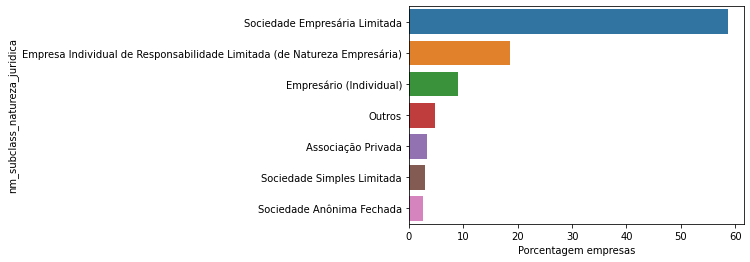

In [19]:
f, ax = plt.subplots()
f.set_size_inches(6, 4)
ax = sea.barplot(x = qt['Porcentagem empresas'], y = qt['nm_subclass_natureza_juridica'])

* __nm_secao__: esta coluna se refere à seção do CNAE

In [20]:
qt = (dataset['nm_secao'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'nm_secao'}, inplace = True)
qt

,nm_secao,Porcentagem empresas
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,28.738786
1,SAÚDE HUMANA E SERVIÇOS SOCIAIS,12.791557
2,CONSTRUÇÃO,11.815303
3,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,10.457344
4,INDÚSTRIAS DE TRANSFORMAÇÃO,10.017590
5,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,6.538259
6,INFORMAÇÃO E COMUNICAÇÃO,5.185576
7,OUTRAS ATIVIDADES DE SERVIÇOS,3.549692
8,TRANSPORTE ARMAZENAGEM E CORREIO,2.510114
9,Outros,2.474934


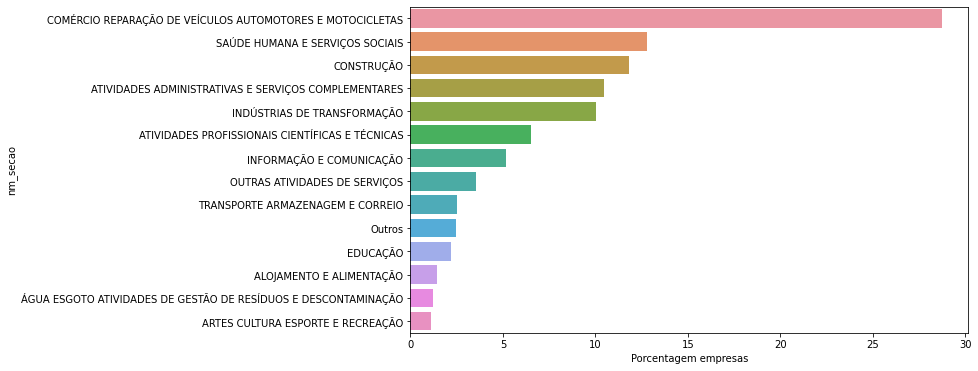

In [21]:
f, ax = plt.subplots()
f.set_size_inches(10, 6)
ax = sea.barplot(x = qt['Porcentagem empresas'], y = qt['nm_secao'])

* __nm_divisao__: esta coluna se refere à divisão do CNAE

In [22]:
qt = (dataset['nm_divisao'].value_counts(normalize = True) * 100).to_frame('Porcentagem empresas').reset_index()
qt.rename(columns = {'index': 'nm_divisao'}, inplace = True)
qt

,nm_divisao,Porcentagem empresas
0,Outros,22.496042
1,COMÉRCIO VAREJISTA,15.588391
2,ATIVIDADES DE ATENÇÃO À SAÚDE HUMANA,11.880387
3,COMÉRCIO POR ATACADO EXCETO VEÍCULOS AUTOMOTOR...,10.508355
4,CONSTRUÇÃO DE EDIFÍCIOS,6.026385
5,SERVIÇOS ESPECIALIZADOS PARA CONSTRUÇÃO,4.177661
6,SERVIÇOS DE ARQUITETURA E ENGENHARIA TESTES E ...,3.978892
7,SERVIÇOS PARA EDIFÍCIOS E ATIVIDADES PAISAGÍST...,3.146878
8,SERVIÇOS DE ESCRITÓRIO DE APOIO ADMINISTRATIVO...,2.728232
9,COMÉRCIO E REPARAÇÃO DE VEÍCULOS AUTOMOTORES E...,2.642040


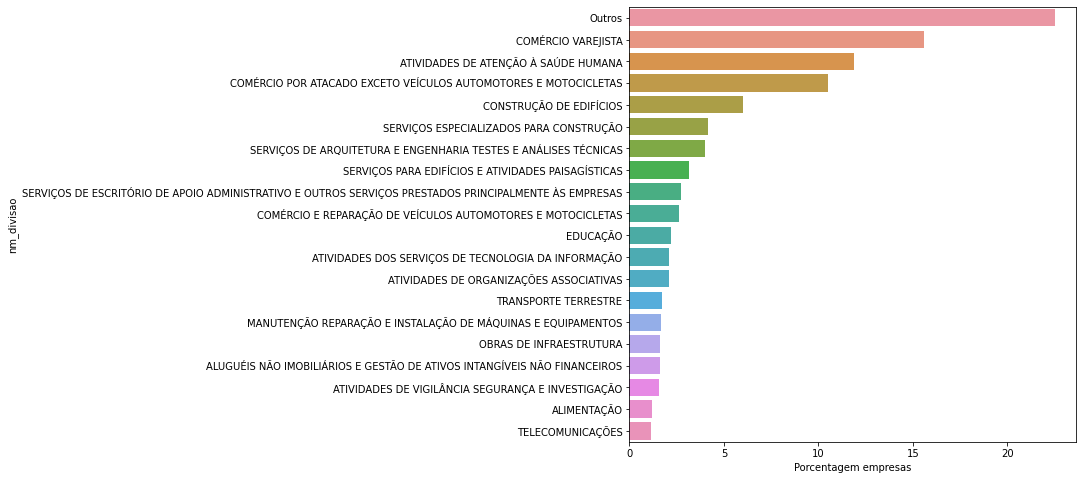

In [23]:
f, ax = plt.subplots()
f.set_size_inches(8, 8)
ax = sea.barplot(x = qt['Porcentagem empresas'], y = qt['nm_divisao'])

* __identificador_matriz__:

In [24]:
qt = (dataset['identificador_matriz'].value_counts(normalize = True).to_frame('Porcentagem empresas') * 100).reset_index()
qt.rename(columns = {'index': 'identificador_matriz'}, inplace = True)
qt

,identificador_matriz,Porcentagem empresas
0,True,94.726473
1,False,5.273527


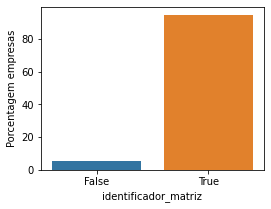

In [25]:
f, ax = plt.subplots()
f.set_size_inches(4, 3)
ax = sea.barplot(y = qt['Porcentagem empresas'], x = qt['identificador_matriz'])

* __idade_empresa__:

In [26]:
dataset['idade_empresa'].describe()

count    56850.000000
mean        18.539402
std         11.602314
min          1.000000
25%         10.000000
50%         16.000000
75%         24.000000
max        114.000000
Name: idade_empresa, dtype: float64

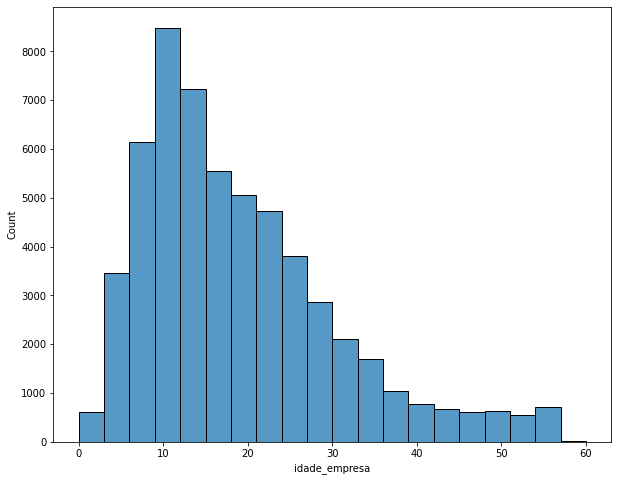

In [27]:
f, ax = plt.subplots()
f.set_size_inches(10, 8)
sea.histplot(dataset['idade_empresa'], bins = 20, binrange = (0, 60))
plt.show()

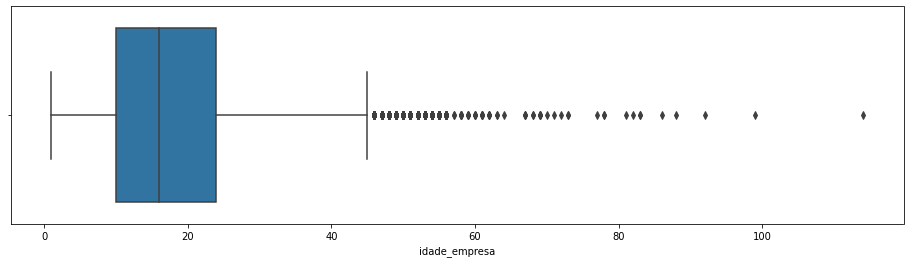

In [28]:
f, ax = plt.subplots()
f.set_size_inches(16, 4)
sea.boxplot(x = dataset['idade_empresa'])
plt.show()

* __capital_social_empresa__:

In [29]:
dataset['capital_social_empresa'].describe()

count    5.685000e+04
mean     2.416621e+07
std      7.912435e+08
min      0.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      4.500000e+05
max      9.000000e+10
Name: capital_social_empresa, dtype: float64

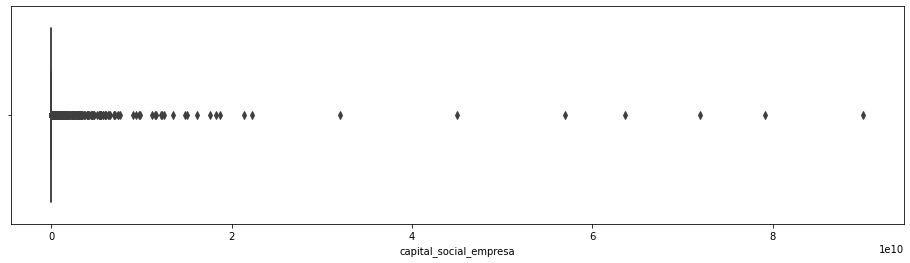

In [30]:
f, ax = plt.subplots()
f.set_size_inches(16, 4)
sea.boxplot(x = dataset['capital_social_empresa'])
plt.show()

Os valores variam por várias ordens de grandeza, vamos tentar visualizar melhor utilizando escala logarítmica:

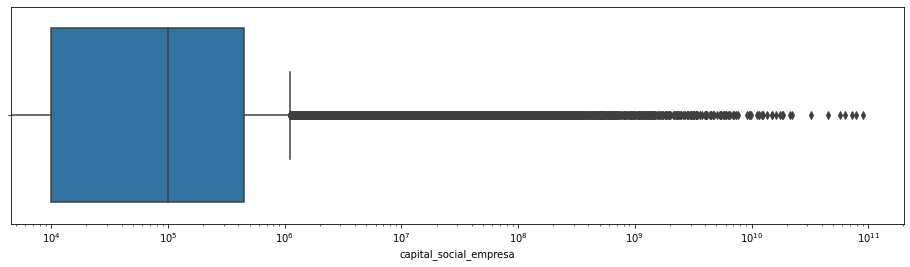

In [31]:
f, ax = plt.subplots()
f.set_size_inches(16, 4)
sea.boxplot(x = dataset['capital_social_empresa']).set_xscale("log")
plt.show()

Para observar a distribuição num histograma, precisamos retirar as entradas com capital social igual a zero, para podermos utilizar escala logarítmica nos valores de capital social.

In [32]:
# Quantidade de empresas com Capital Social igual a zero:
dataset[dataset['capital_social_empresa'] == 0.0].index.nunique()

9337

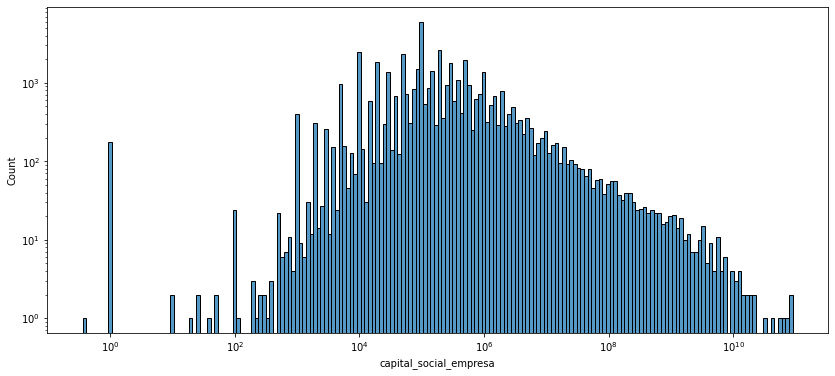

In [33]:
df = dataset[dataset['capital_social_empresa'] > 0.0]
f, ax = plt.subplots()
f.set_size_inches(14, 6)
sea.histplot(df['capital_social_empresa'], log_scale = True)
f.get_axes()[0].set_yscale('log')
plt.show()

* __participacoes__:

In [34]:
dataset['participacoes'].describe()

count     56850.000000
mean        773.320211
std        3987.962876
min           0.000000
25%           2.000000
50%          21.000000
75%         227.000000
max      239891.000000
Name: participacoes, dtype: float64

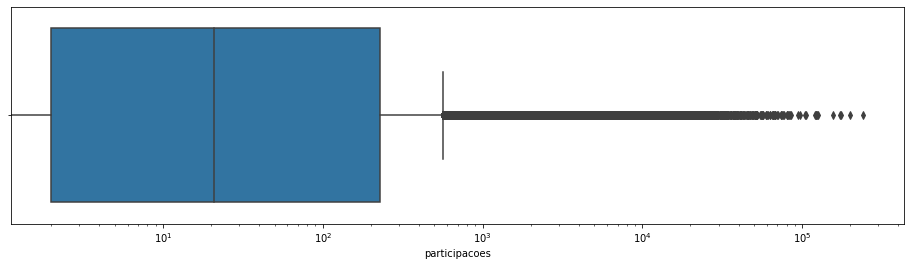

In [35]:
f, ax = plt.subplots()
f.set_size_inches(16, 4)
sea.boxplot(x = dataset['participacoes']).set_xscale("log")
plt.show()

* __vitorias__:

In [36]:
dataset['vitorias'].describe()

count    56850.000000
mean       127.203342
std        743.158312
min          0.000000
25%          2.000000
50%          6.000000
75%         41.000000
max      50899.000000
Name: vitorias, dtype: float64

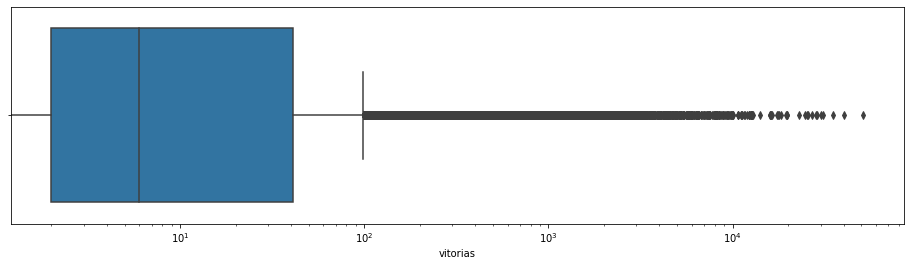

In [37]:
f, ax = plt.subplots()
f.set_size_inches(16, 4)
sea.boxplot(x = dataset['vitorias']).set_xscale("log")
plt.show()

* __contratos__:

In [38]:
dataset['contratos'].describe()

count    56850.000000
mean         4.667142
std         18.977881
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1633.000000
Name: contratos, dtype: float64

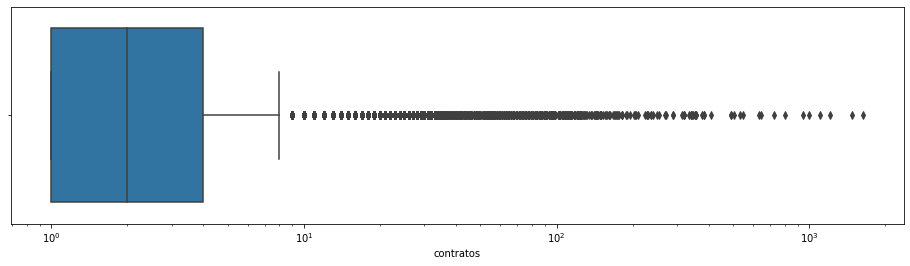

In [39]:
f, ax = plt.subplots()
f.set_size_inches(16, 4)
sea.boxplot(x = dataset['contratos']).set_xscale("log")
plt.show()

* __risco__: é a variável de interesse

In [40]:
quantidades = dataset['risco'].value_counts().to_frame('quantidade_empresas').reset_index()
quant = pd.merge(quantidades, dataset['risco'], left_on = 'index', right_on = 'risco')
quant.drop_duplicates(inplace = True)
quant.drop(['index'], axis = 1, inplace = True)
quant['porcentagem_do_total'] = quant['quantidade_empresas'].astype(int).div(len(dataset.index)).mul(100)
quant.reset_index(inplace = True)
quant.rename(columns = {'risco': 'Risco', 'porcentagem_do_total': 'Porcentagem do Total', 'quantidade_empresas': 'Quantidade de Empresas'}, inplace = True)
quant[['Risco', 'Quantidade de Empresas', 'Porcentagem do Total']]

,Risco,Quantidade de Empresas,Porcentagem do Total
0,False,40652,71.507476
1,True,16198,28.492524


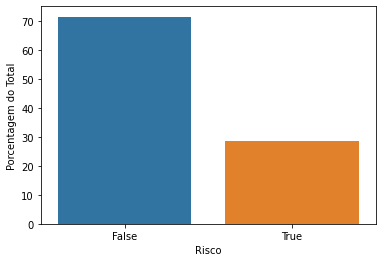

In [41]:
f, ax = plt.subplots()
f.set_size_inches(6, 4)
ax = sea.barplot(y = quant['Porcentagem do Total'], x = quant['Risco'])

O dataset é desbalanceado.

## Relações entre as variáveis preditivas e a coluna _risco_

* __uf__:

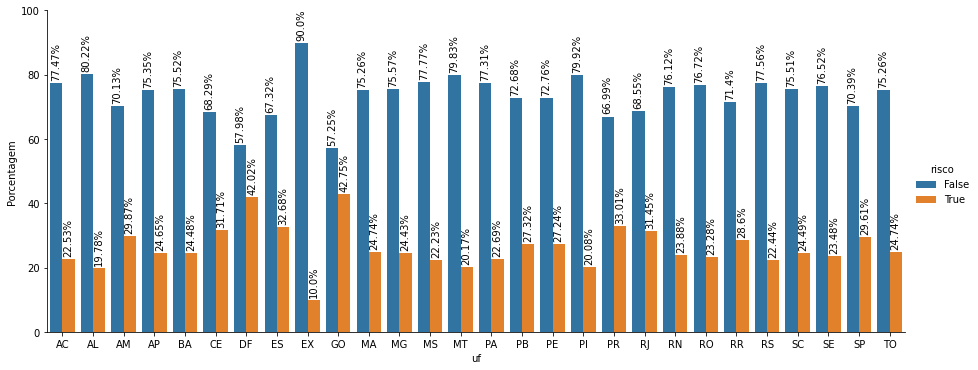

In [42]:
x, y = 'uf', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 2.5)
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.03
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt, rotation = 90)

Interessante notar que a proporção entre empresas com risco de descumprimento contratual e sem risco varia bastante de acordo com o estado onde está sediada...

* __municipio__:

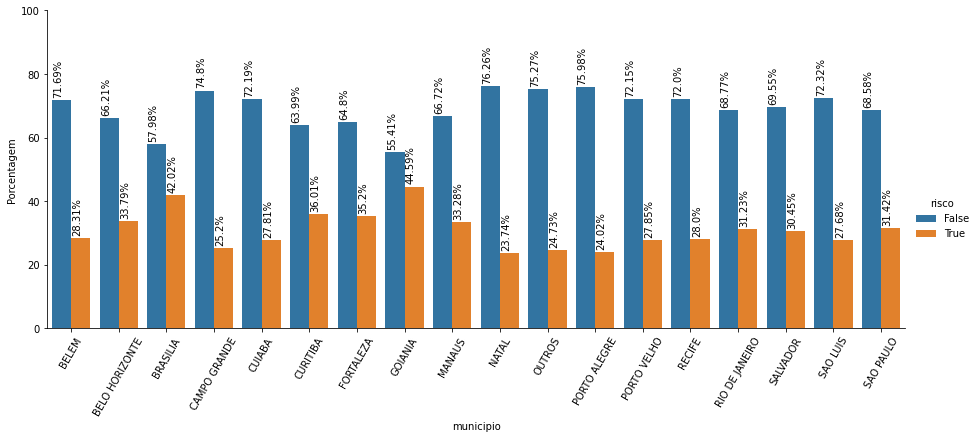

In [43]:
x, y = 'municipio', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 2.5)
g.set_xticklabels(rotation = 60)
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.03
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt, rotation = 90)

* __porte_empresa__:

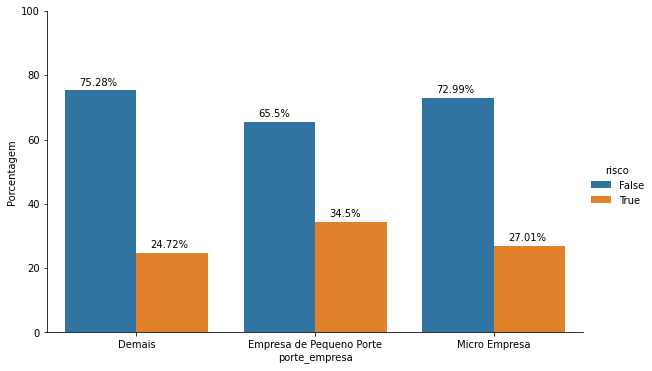

In [44]:
x, y = 'porte_empresa', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 1.6)
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.08
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt)

* __nm_subclass_natureza_juridica__:

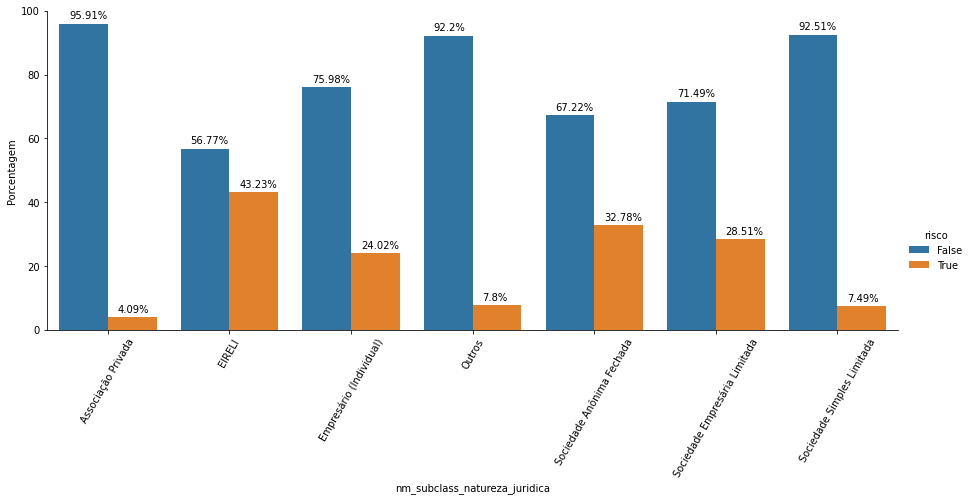

In [45]:
x, y = 'nm_subclass_natureza_juridica', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()
df1['nm_subclass_natureza_juridica'] = df1['nm_subclass_natureza_juridica'].apply(lambda x: x.replace('Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)', 'EIRELI'))

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 2.5)
g.set_xticklabels(rotation = 60)
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.08
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt)

Notamos bastante variação na proporção entre empresas com risco e sem risco de acordo com a natureza jurídica.

* __nm_secao__: relacionado ao CNAE

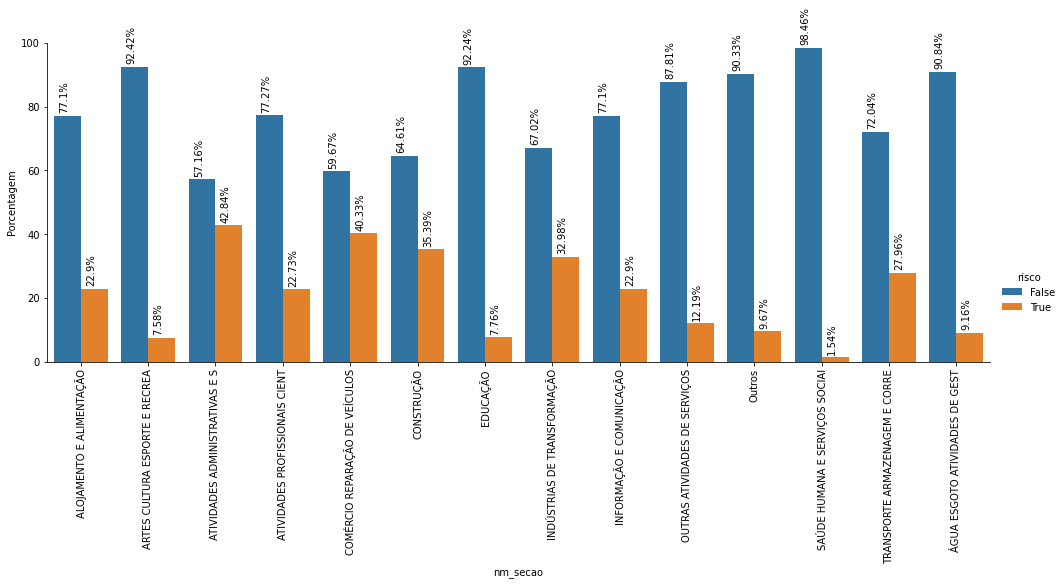

In [46]:
x, y = 'nm_secao', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()
df1['nm_secao'] = df1['nm_secao'].apply(lambda x: x[:30])

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 2.8)
g.set_xticklabels(rotation = 90)
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.08
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt, rotation = 90)

* __nm_divisao__: relacionado ao CNAE

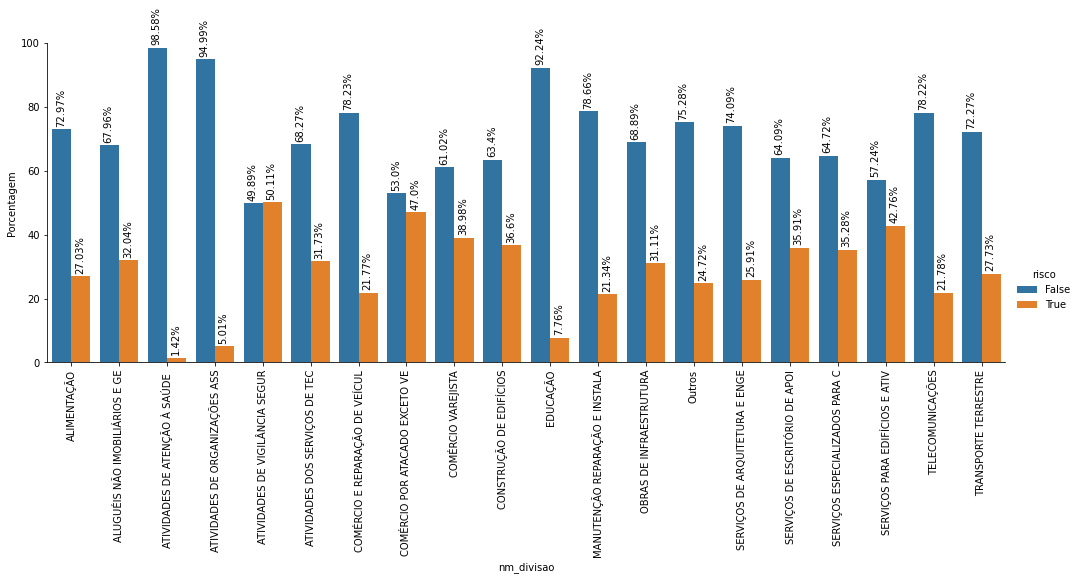

In [47]:
x, y = 'nm_divisao', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()
df1['nm_divisao'] = df1['nm_divisao'].apply(lambda x: x[:30])

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 2.8)
g.set_xticklabels(rotation = 90)
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.08
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt, rotation = 90)

* __situacao_cadastral_ativa__:

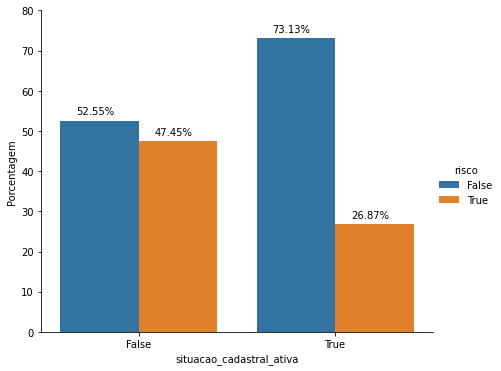

In [48]:
x, y = 'situacao_cadastral_ativa', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 1.2)
g.ax.set_ylim(0, 80)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.08
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt)

* __identificador_matriz__:

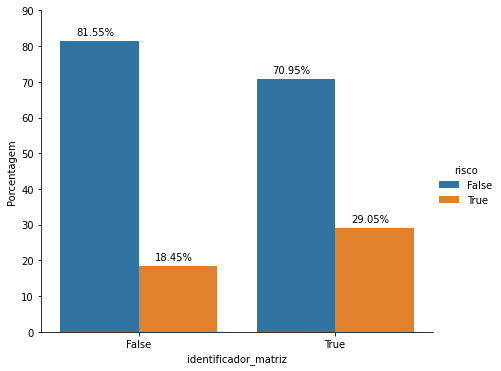

In [49]:
x, y = 'identificador_matriz', 'risco'

df1 = dataset.groupby(x)[y].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('Porcentagem').reset_index()

g = sea.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df1, aspect = 1.2)
g.ax.set_ylim(0, 90)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.08
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt)

* __idade_empresa__:

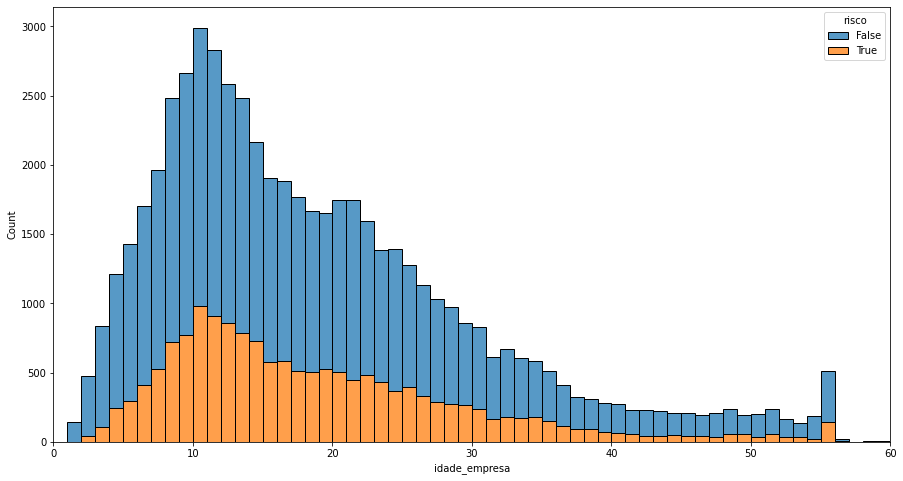

In [50]:
f, ax = plt.subplots(figsize = (15, 8))
sea.histplot(
    dataset[['idade_empresa', 'risco']],
    x = 'idade_empresa', 
    hue = 'risco',
    multiple = 'stack',
    bins = 60,
    binrange = (0, 60)
)
ax.set_xlim(0, 60)
plt.show()

A idade da empresa parece não influenciar muito sua tendência a descumprir contratos.

* __capital_social_empresa__:

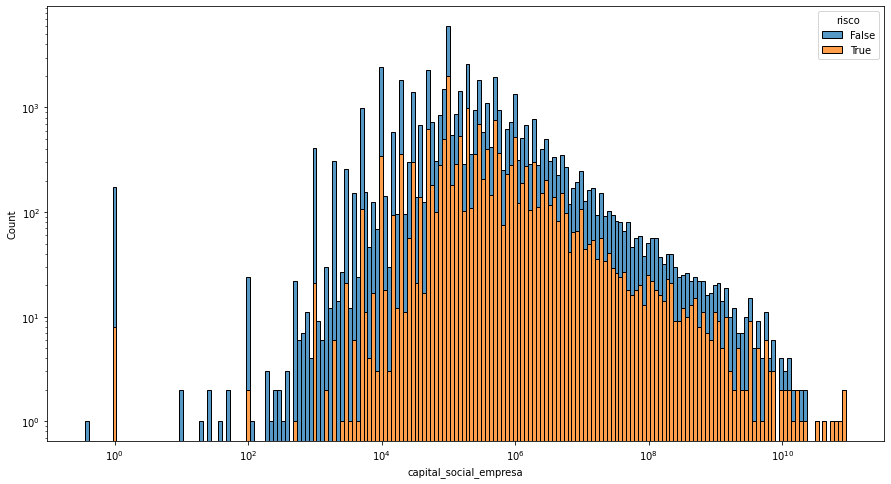

In [51]:
df = dataset[['capital_social_empresa', 'risco']]
df = df[df['capital_social_empresa'] > 0]

f, ax = plt.subplots(figsize = (15, 8))
sea.histplot(
    df,
    x = 'capital_social_empresa', 
    hue = 'risco',
    multiple = 'stack',
    log_scale = True
)
f.get_axes()[0].set_yscale('log')
plt.show()

* __participacoes__:

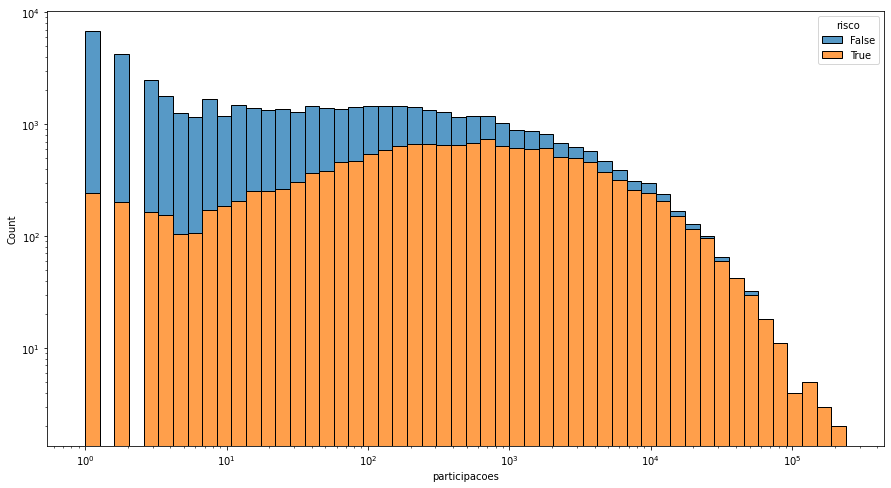

In [52]:
df = dataset[['participacoes', 'risco']]
df = df[df['participacoes'] > 0]

f, ax = plt.subplots(figsize = (15, 8))
sea.histplot(
    df,
    x = 'participacoes', 
    hue = 'risco',
    multiple = 'stack',
    log_scale = True
)
f.get_axes()[0].set_yscale('log')
plt.show()

Empresas com muitas participações tendem a ter maior risco de ter alguma ocorrência registrada.

* __vitorias__:

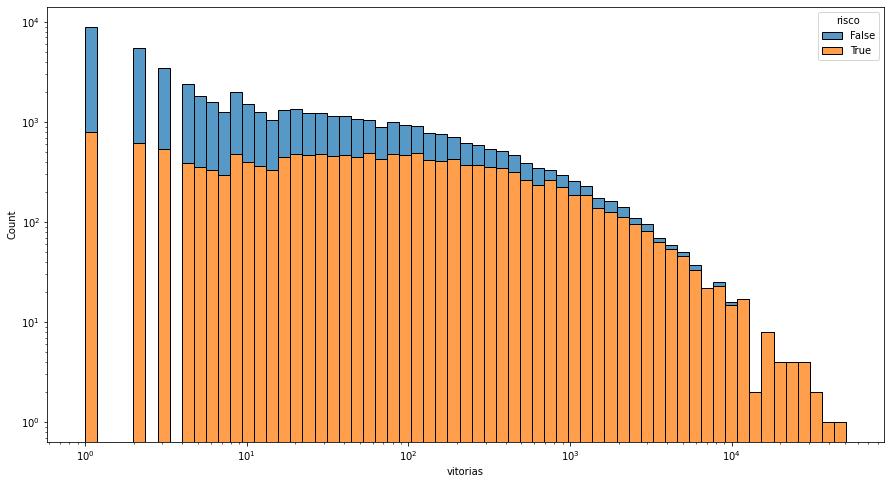

In [53]:
df = dataset[['vitorias', 'risco']]
df = df[df['vitorias'] > 0]

f, ax = plt.subplots(figsize = (15, 8))
sea.histplot(
    df,
    x = 'vitorias', 
    hue = 'risco',
    multiple = 'stack',
    log_scale = True
)
f.get_axes()[0].set_yscale('log')
plt.show()

* __contratos__:

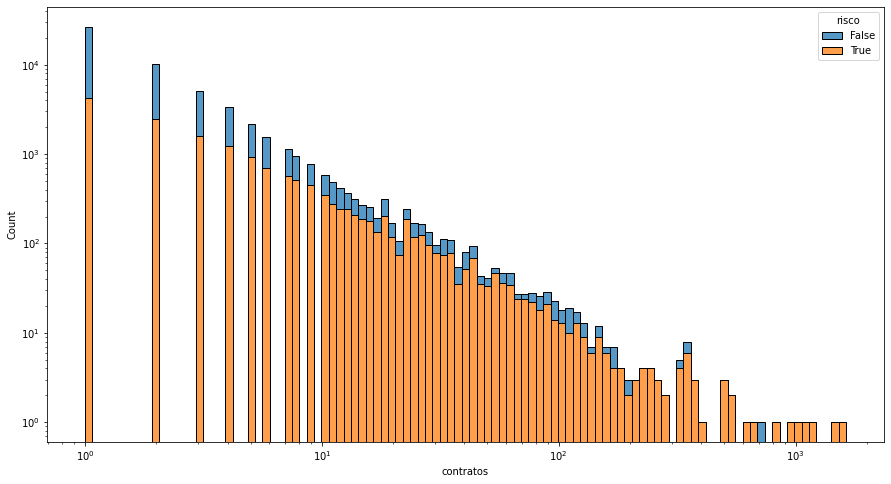

In [54]:
f, ax = plt.subplots(figsize = (15, 8))
sea.histplot(
    dataset[['contratos', 'risco']],
    x = 'contratos', 
    hue = 'risco',
    multiple = 'stack',
    log_scale = True   
)
f.get_axes()[0].set_yscale('log')
plt.show()

# Gráfico de associações e correlações
Para obter uma visualização clara das relações entre as variáveis presentes no dataset, utilizaremos a biblioteca _sweetviz_, que, entre outras informações, fornece um excelente gráfico de associações. Neste gráfico, __quadrados__ representam associações envolvendo pelo menos uma variável categórica e __círculos__ representam correlação, que é calculada entre duas variáveis contínuas.

In [55]:
import sweetviz as sv

In [56]:
feature_config = sv.FeatureConfig(skip = ['cnpj', 'razao_social'])
report = sv.analyze(dataset, 'risco', feature_config)

                                             |          | [  0%]   00:00 -> (? left)


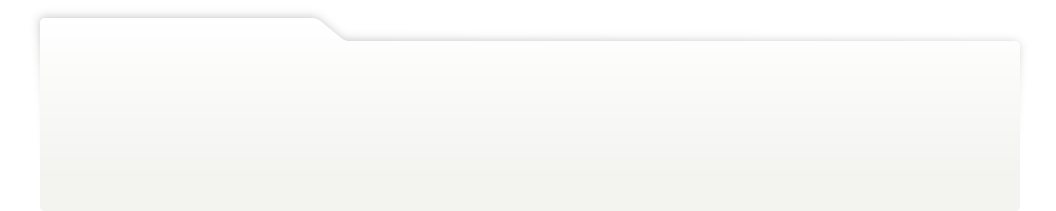
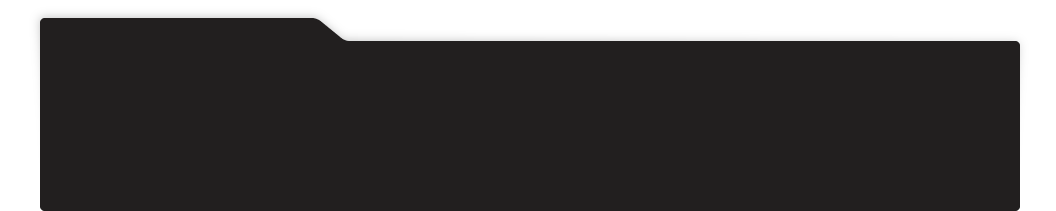
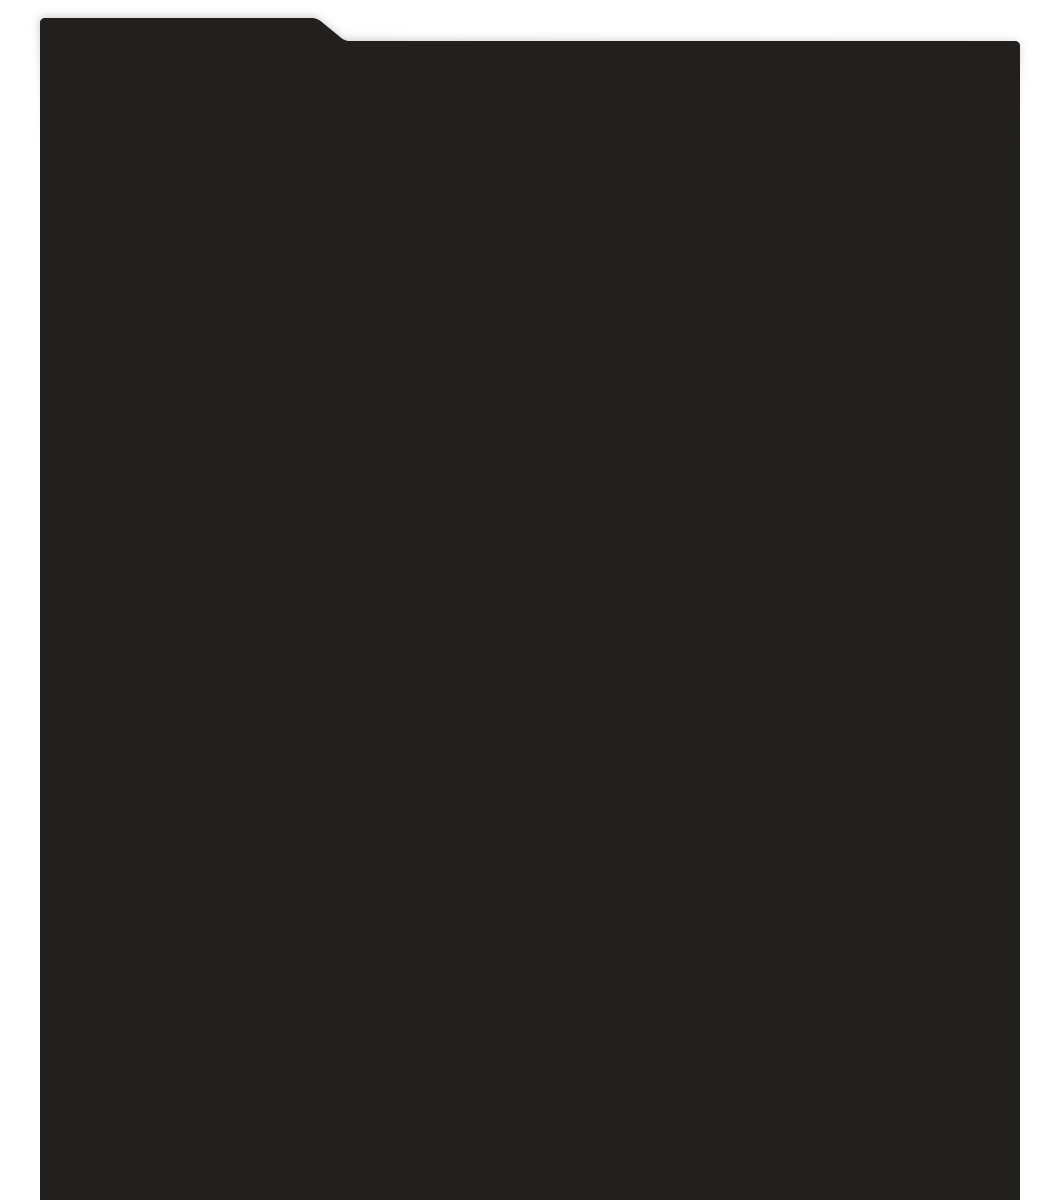
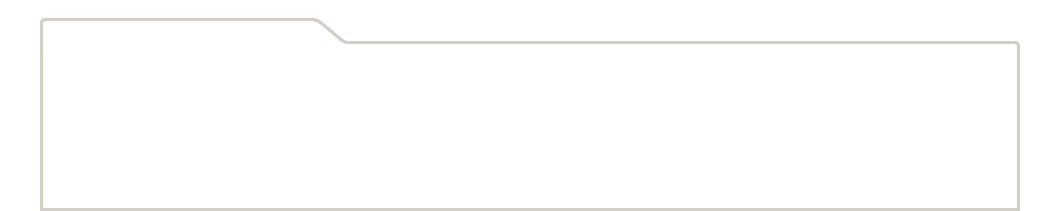
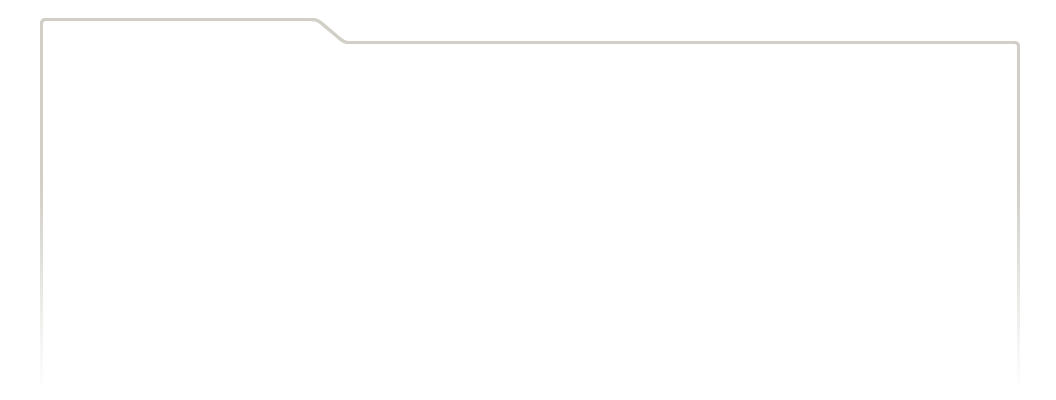
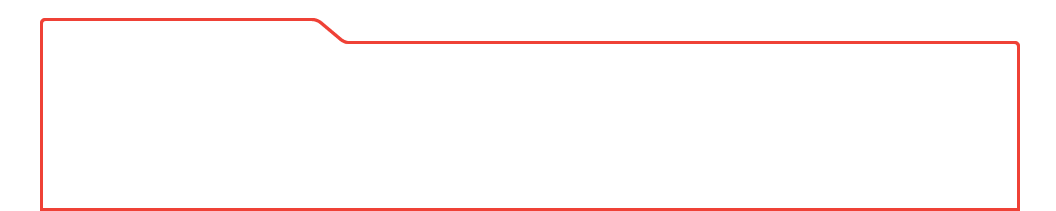
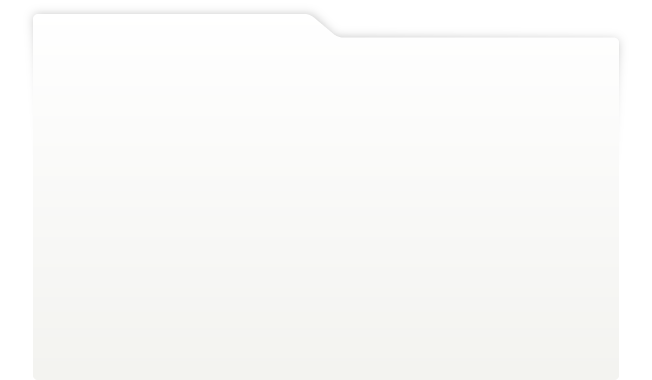
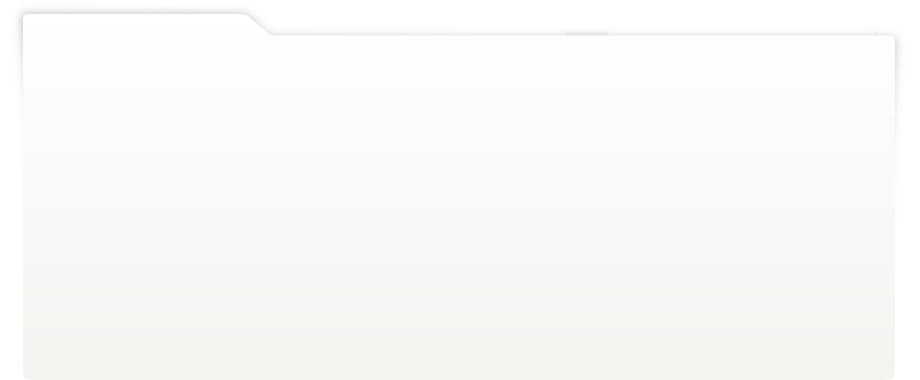
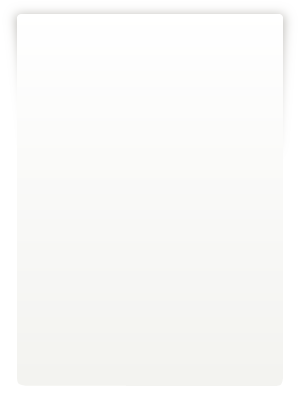
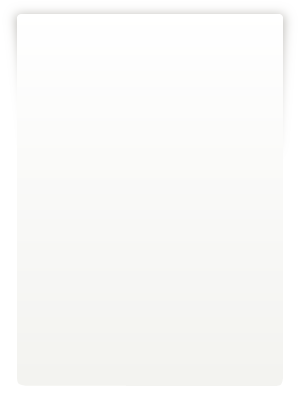
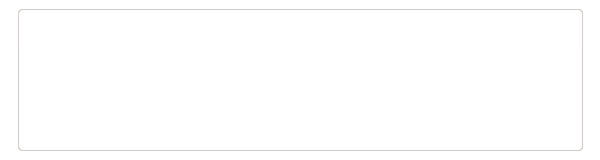
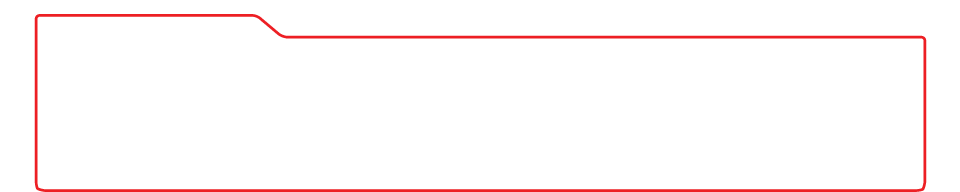
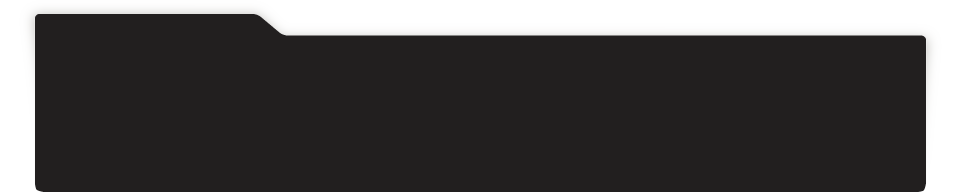
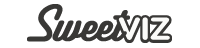
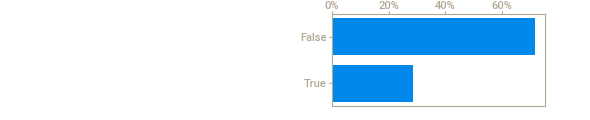
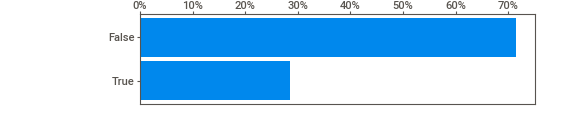
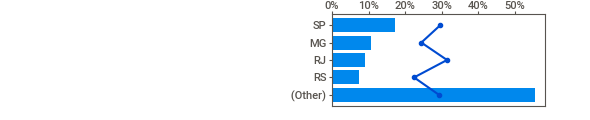
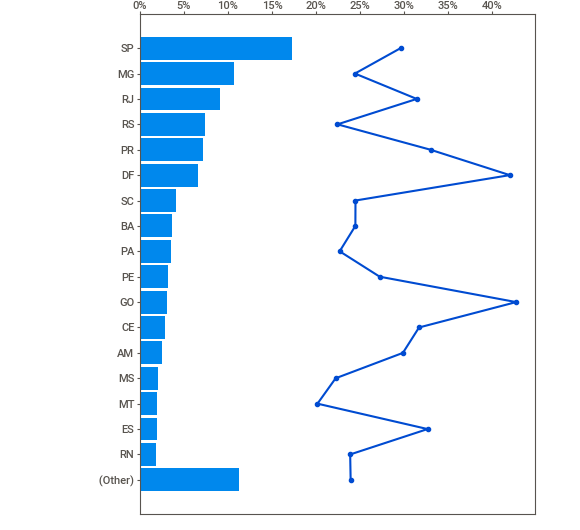
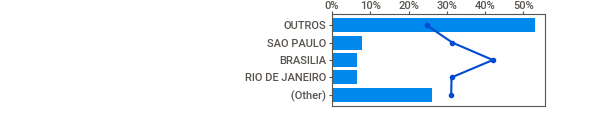
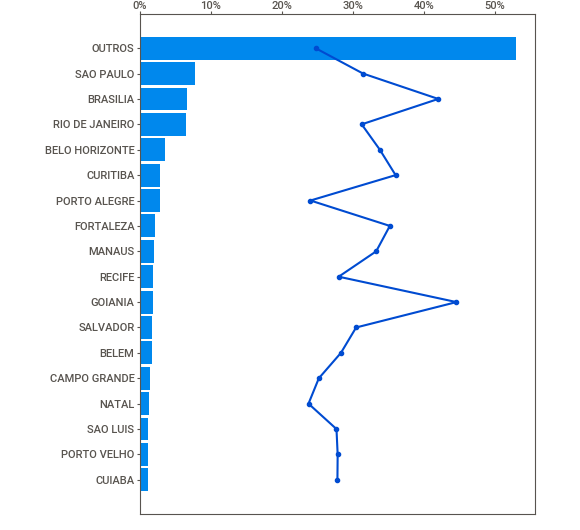
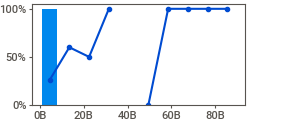
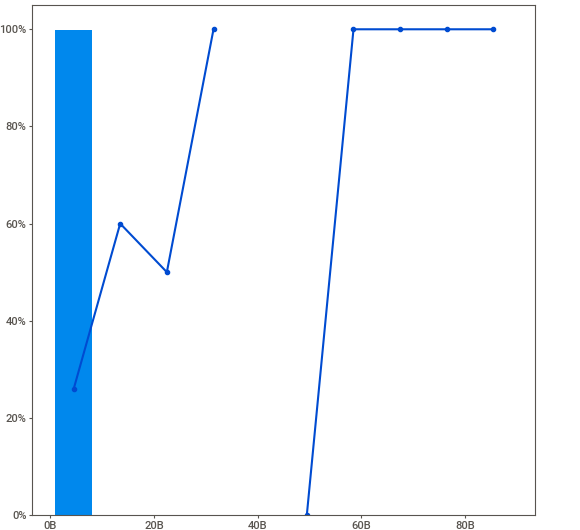
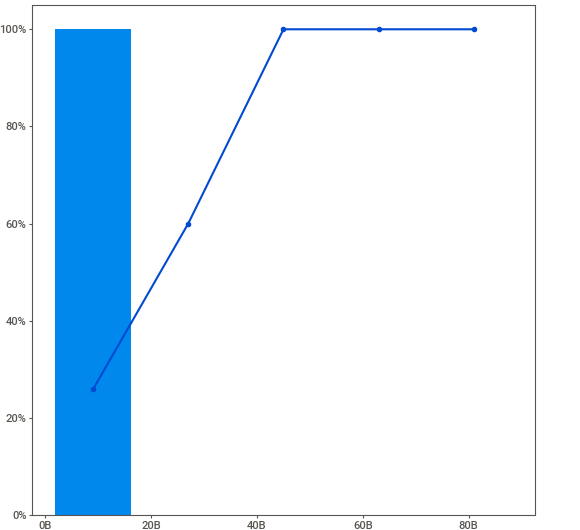
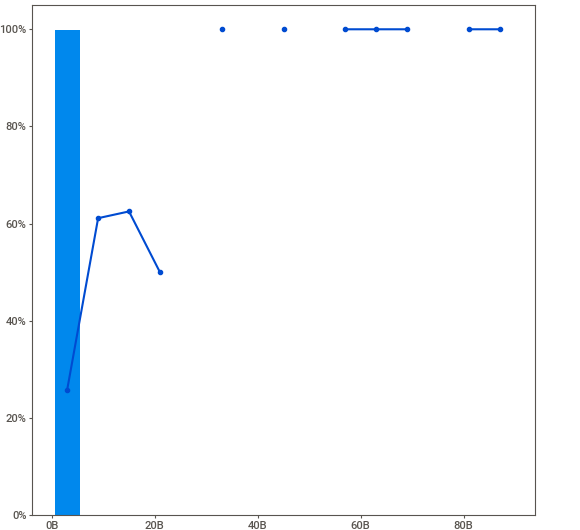
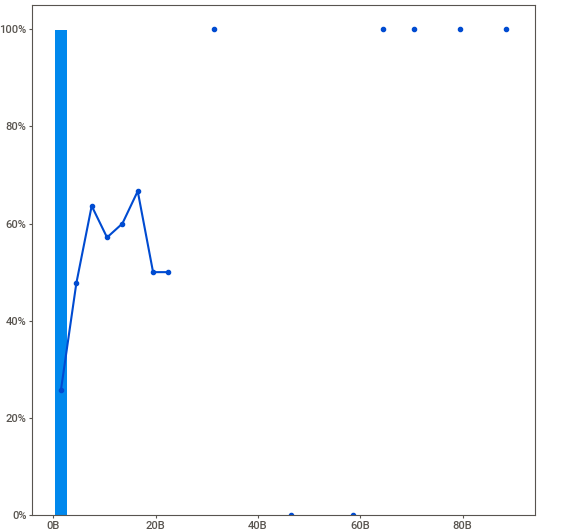
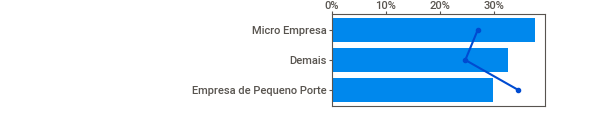
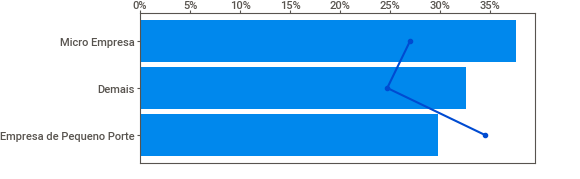
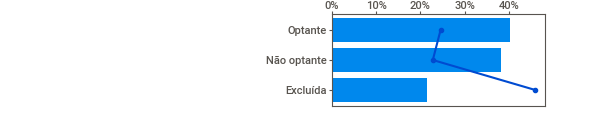
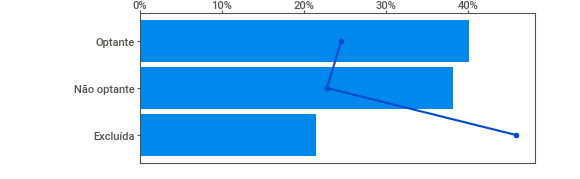
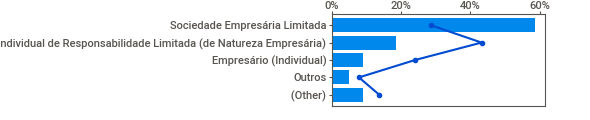
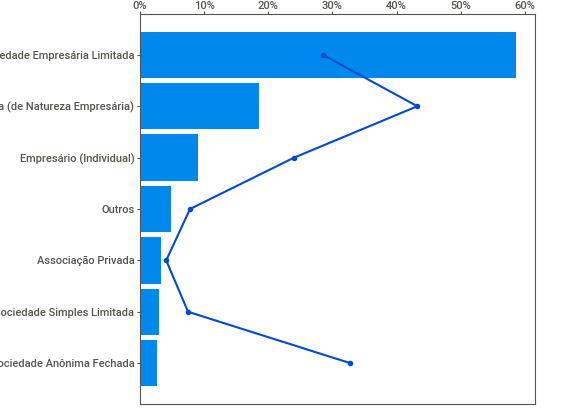
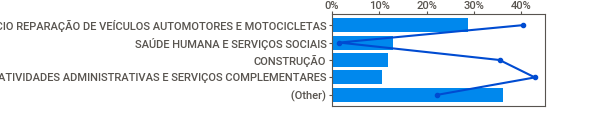
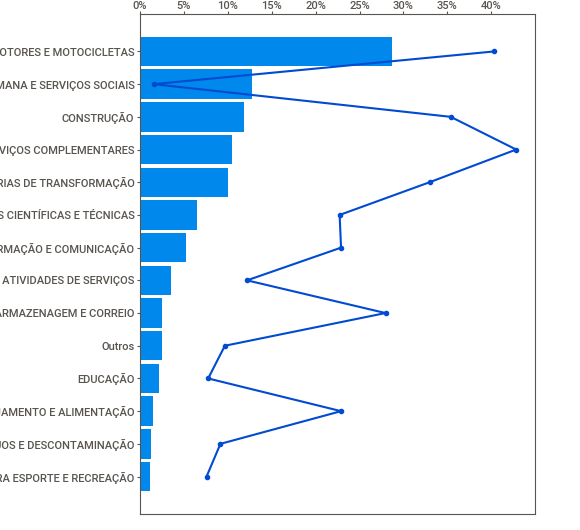
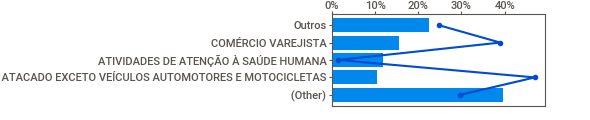
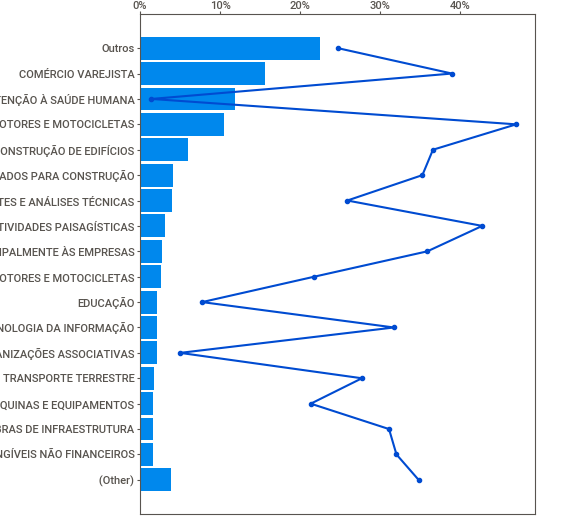
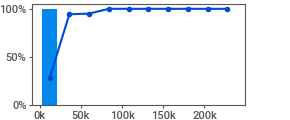
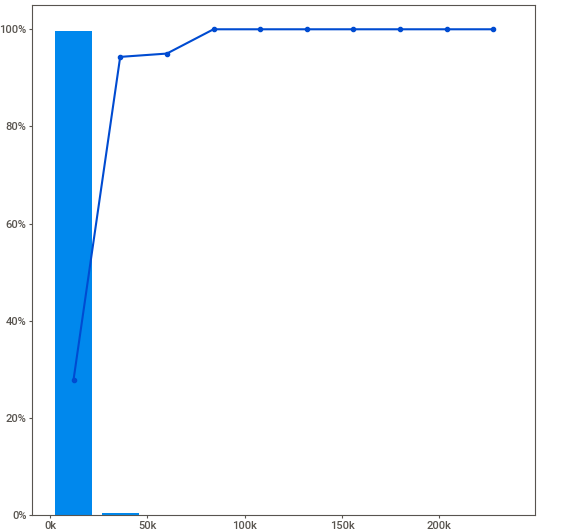
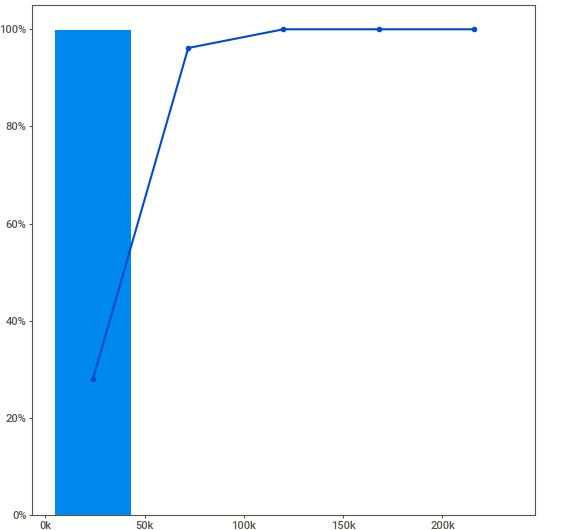
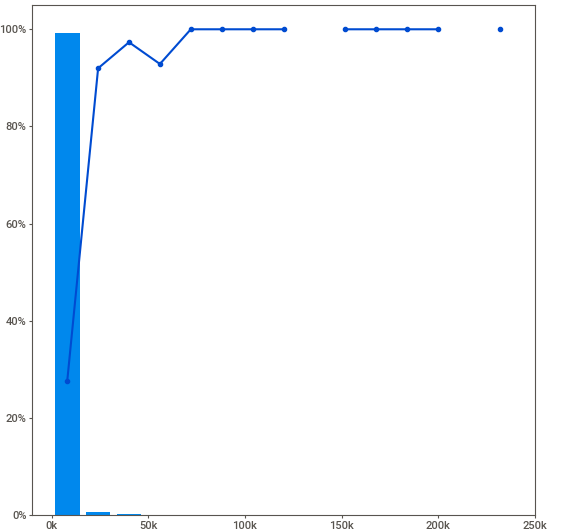
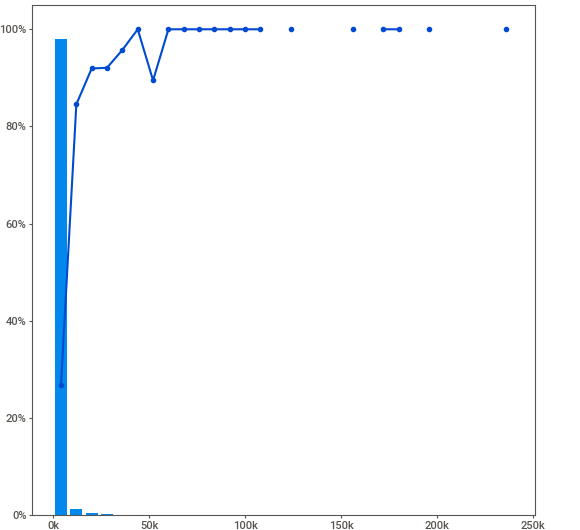
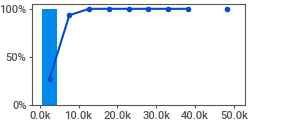
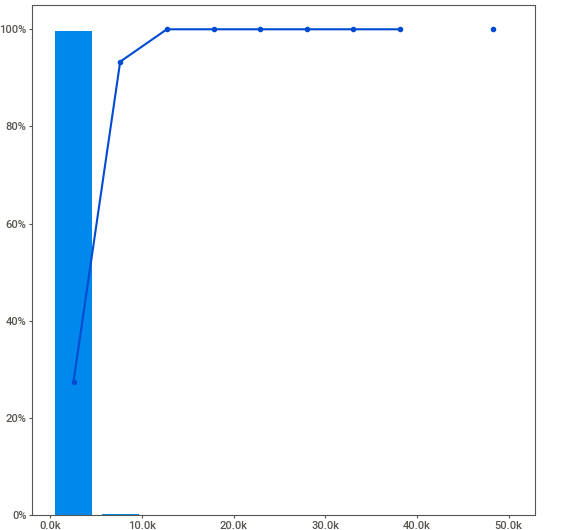
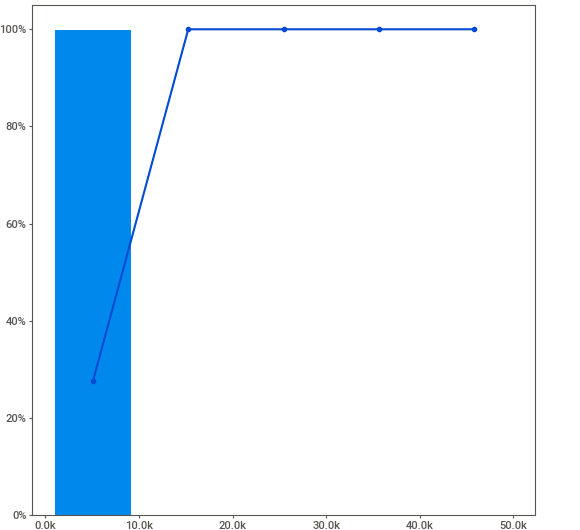
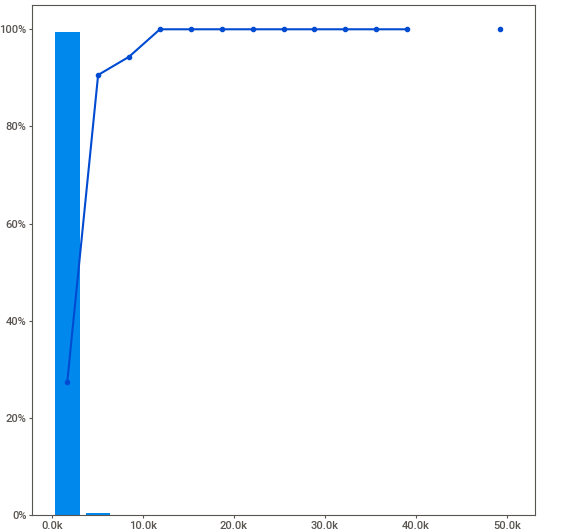
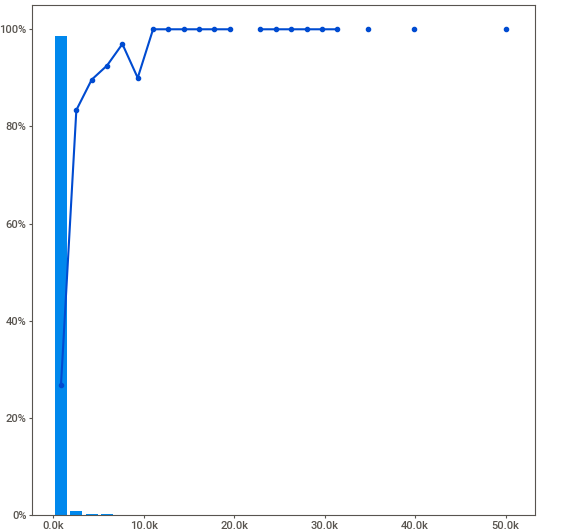
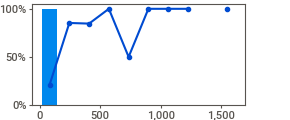
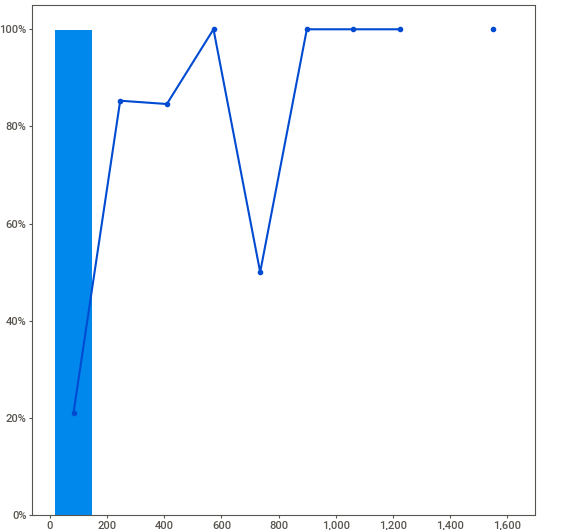
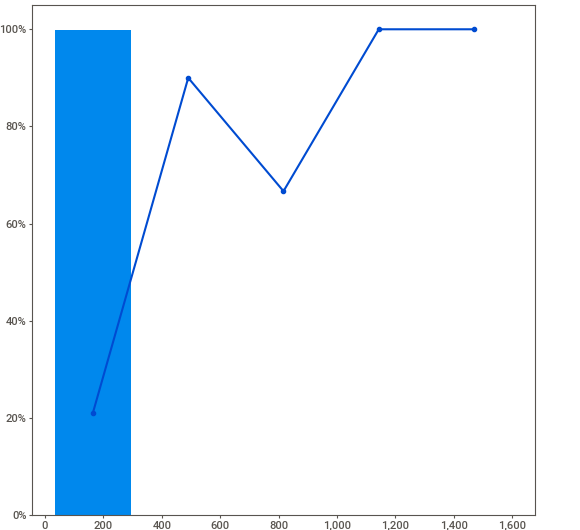
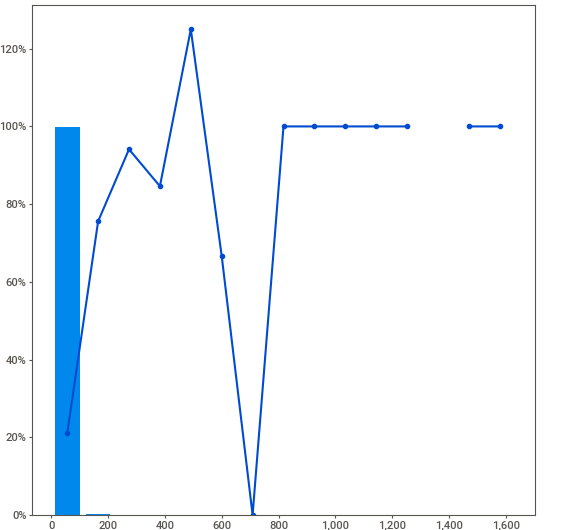
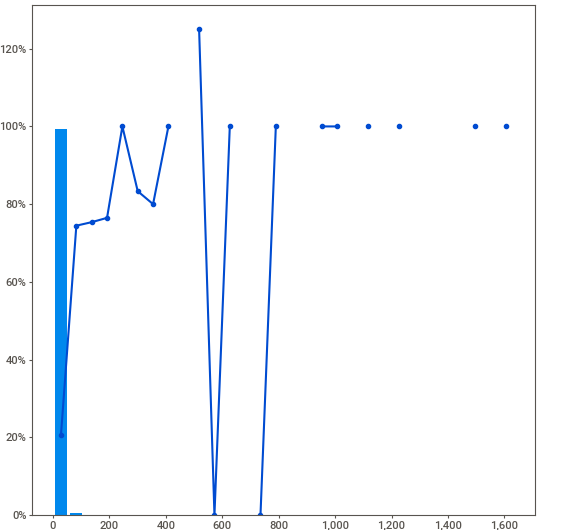
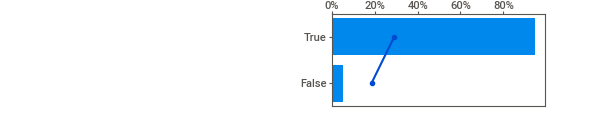
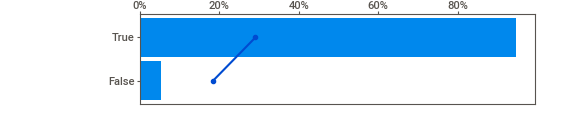
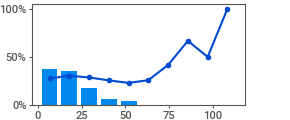
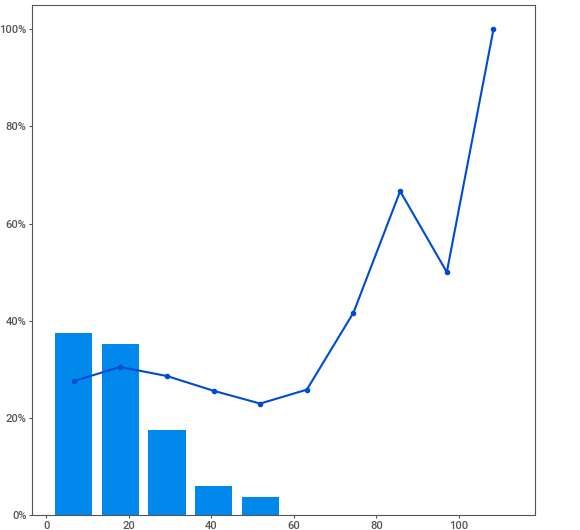
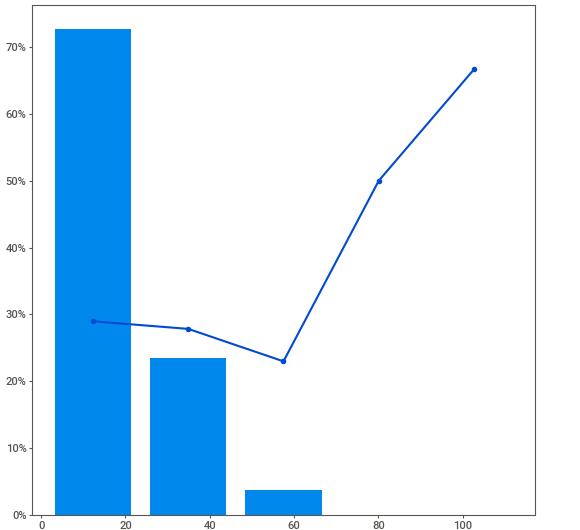
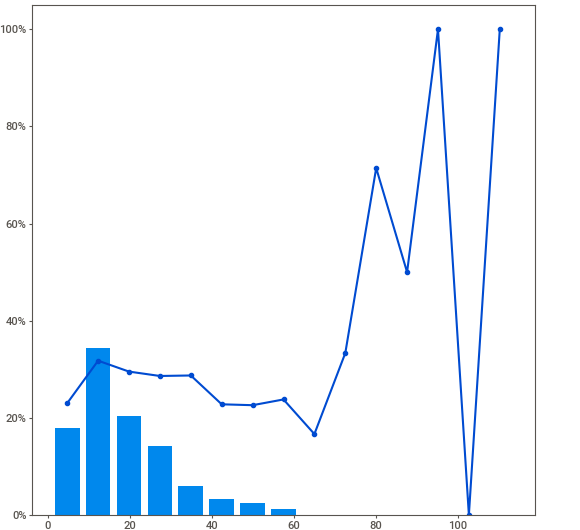
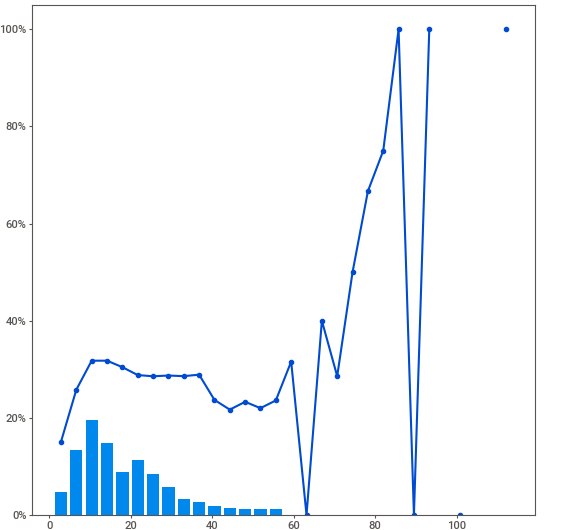
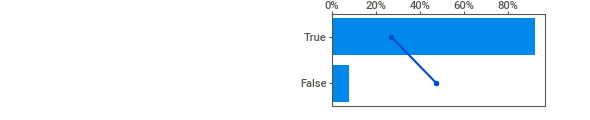
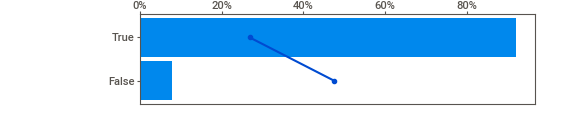
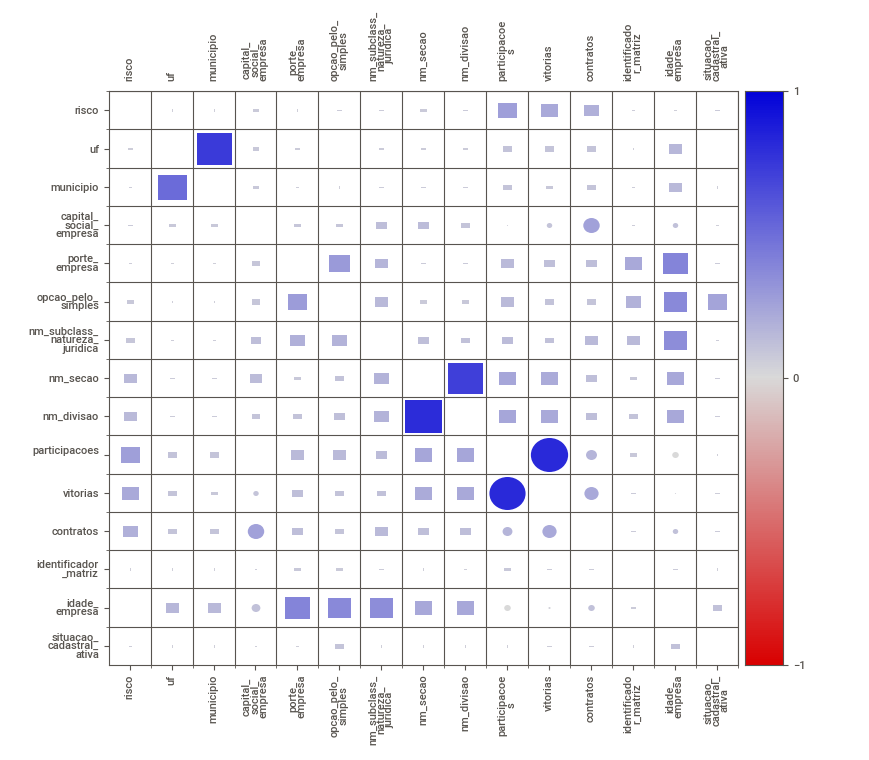
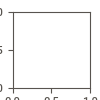

In [57]:
report.show_notebook(layout = 'vertical') #Para mostrar o relatório no notebook

In [58]:
# Salvando o relatório em HTML
report.show_html( filepath  = 'Sweetviz_report.html', 
                  open_browser = True, 
                  layout = 'vertical', 
                  scale = None)

Report Sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


O relatório gerado pelo _sweetviz_ foi salvo como 'Sweetviz_report.html'. A seguir, incluimos o gráfico de associações criado:

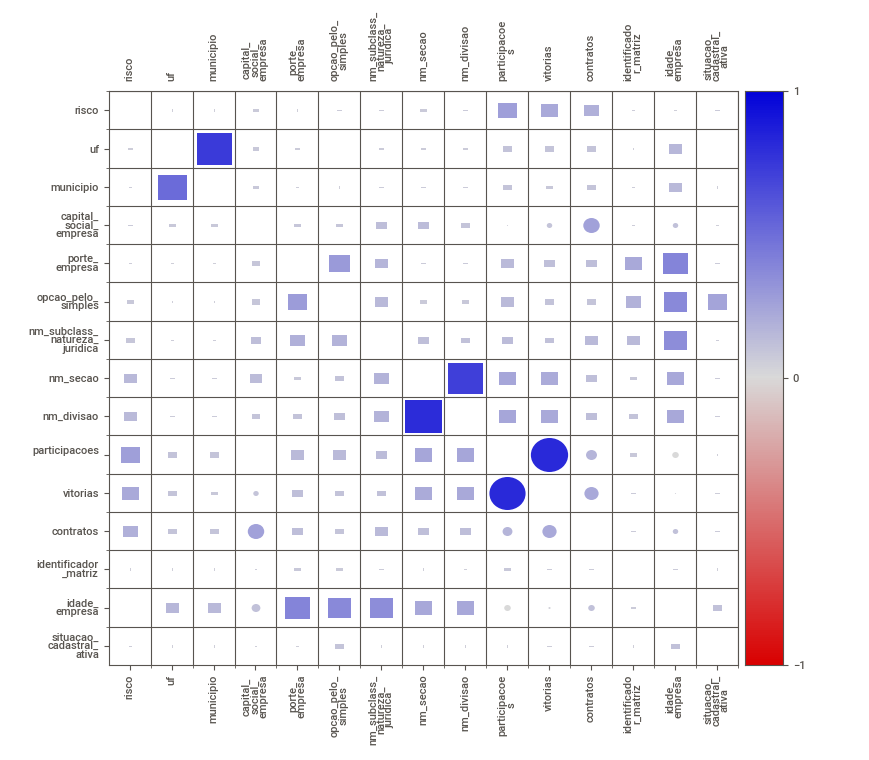

* Numerical correlation (between numerical features) - círculos
* Uncertainty coefficient (for categorical-categorical) - quadrados
* Correlation ratio (for categorical-numerical) - quadrados